In [19]:
#import requried lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [21]:
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['price']=boston.target

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
df.shape

(506, 14)

In [23]:
x = df.drop('price',axis=1)
y= df['price']

In [24]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

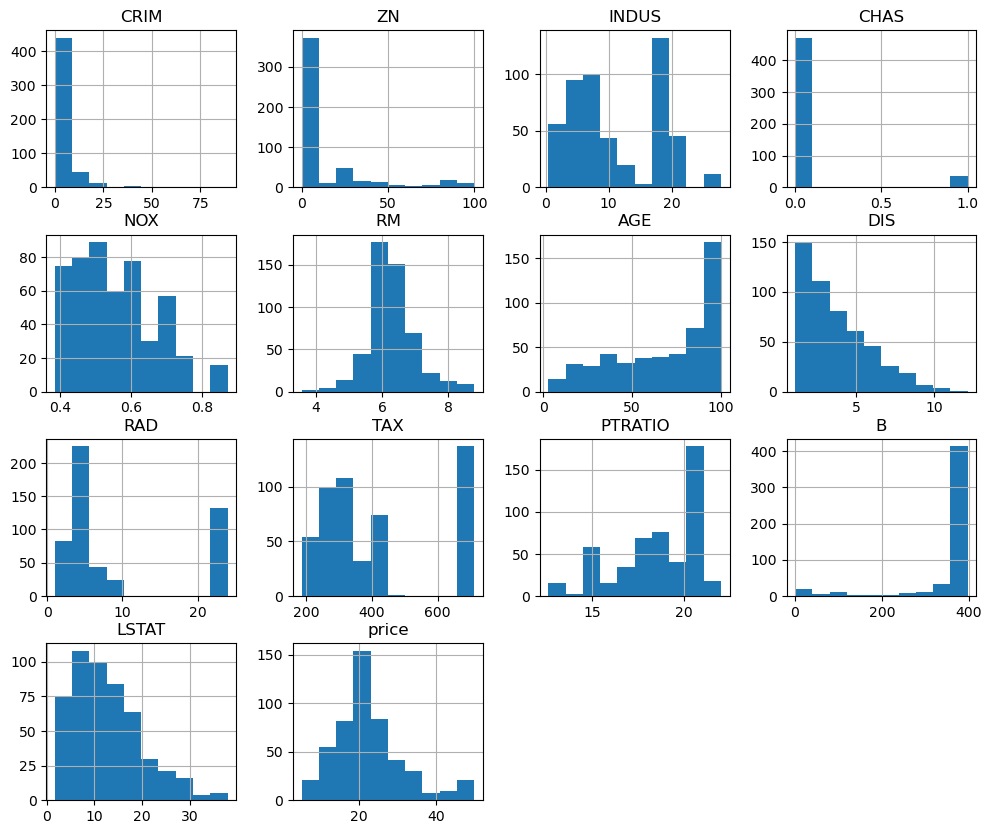

In [25]:
df.hist(figsize=(12,10))

In [27]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.25,random_state =2)
print(len(xtest) , len(ytest))

127 127


In [28]:
#build Base regression model
base_reg = LinearRegression()
print('**************base regression************')
print()
print('Training Started')
base_reg.fit(xtrain,ytrain)
print()
base_pred=base_reg.predict(xtest)

#Preformance Matrics

from sklearn.metrics import r2_score
print('Bases Train_score: \t' ,base_reg.score(xtrain,ytrain))
print()
print('Bases Test_score: \t' ,base_reg.score(xtest,ytest))
print()
print('R-Square:\t',r2_score(ytest,base_pred))

**************base regression************

Training Started

Bases Train_score: 	 0.7341220456408117

Bases Test_score: 	 0.7503116174489239

R-Square:	 0.7503116174489239


In [31]:
#Build Ridge model
print('**************Ridge Regression Model*******')
rr= Ridge(alpha=0.01)
rr.fit(xtrain,ytrain)
rr_pred=rr.predict(xtest)
print('Ridge Train_score:\t',rr.score(xtrain,ytrain))
print()
print('Ridge Test_score:\t',rr.score(xtest,ytest))
print()
print('Ridge R-Square:\t',r2_score(ytest,rr_pred))

**************Ridge Regression Model*******
Ridge Train_score:	 0.7341213497874965

Ridge Test_score:	 0.7502556356770576

Ridge R-Square:	 0.7502556356770576


In [32]:
#Build Ridge model with 100
print('**************Ridge Regression Model*******')
rr100= Ridge(alpha=100)
rr100.fit(xtrain,ytrain)
rr100_pred=rr100.predict(xtest)
print('Ridge Train_score:\t',rr100.score(xtrain,ytrain))
print()
print('Ridge Test_score:\t',rr100.score(xtest,ytest))
print()
print('Ridge R-Square:\t',r2_score(ytest,rr100_pred))

**************Ridge Regression Model*******
Ridge Train_score:	 0.7083664439503324

Ridge Test_score:	 0.7257852243267169

Ridge R-Square:	 0.7257852243267169


In [34]:
base_reg.coef_

array([-9.81915048e-02,  3.48400626e-02, -1.65945367e-02,  3.36283135e+00,
       -1.61477570e+01,  3.57041012e+00,  4.56458846e-03, -1.39585375e+00,
        3.15975518e-01, -1.20505823e-02, -1.04852815e+00,  1.14536184e-02,
       -5.52653040e-01])

# Lasso Regression for Boston dataset

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
